케라스 개발 과정
학습 데이터 정의 -> 모델 구성 -> 학습 -> 평가

# 신경망의 작동 원리
X를 보고 y를 예측을 하는데 각 층을 지날 때마다 **가중치**가 붙는다.</br>
-> 정답과 가까이 하기 위해 가중치를 조정해야 함!! - 가중치 조정이 관건(학습하면서 자연스럽게 가중치를 조정함)</br>
-> 어떻게 알고 가중치를 조정할까? - '**손실함수**'가 체점을 한다. 예측한 값 y와 진짜 타깃 y를 손실함수가 비교를 한다.</br>
-> **손실점수**를 도출하고 다음 학습에서 가중치를 조정을 한다. - **역전파** 알고리즘을 구현한 옵티마이저가 담당 / 역전파를 통해 피드백을 하여 가중치를 업데이트를 한다.</br>
-> 궁극적으로 손실점수가 줄어드는 방향으로 나아간다.</br>
오답노트 = 손실점수</br>
피드백 = 옵티마이저</br>



분류 모델 / 회귀 모델에 가장 좋은 모델이 정해져 있어서 그것을 사용하기만 하면 된다.

각 층에 신경망(신경망을 사람이라 생각하기)들이 들어 있음</br>
퍼셉트론 - X를 입력받아 y를 도출한다.</br>
ex) 옷을 사려는데 x1, x2 친구에게 물어봄 / x1에게 가중치(w1)가 더 많이 들어온다면 y를 도출할 때 x1의 영향을 많이 받는다.</br>
가중치가 강하게 올수록 강한 값을 도출한다.</br>
y 값을 도출하는 것은 '활성화 함수'가 결정을 해준다.</br>

**시그모이드 / 탄젠트 / ReLU**가 활성화 함수이다.</br>
어떤 활성화 함수를 쓸지는 내가 결정을 해야한다.</br>
시그모이드는 출력층(최종 y값)에 가장 많이 사용된다. / 결과를 낼 때</br>
ReLU는 중간층에서 가장 많이 사용된다. / '고요속의 외침' 게임과 비슷함 / 정확하게 알려줘야 하므로! </br>



# XOR 게이트 문제

XOR게이트 구현해보기 -> 0,0 -> 0 / 1,0 -> 1 / 0,1 -> 1 / 1,1 -> 0 

데이터 준비하기

In [1]:
import numpy as np
import tensorflow as tf

tf.random.set_seed(777) # 랜덤시드를 고정시키지 않으면 오래걸릴 수가 있으므로 랜덤 시드를 고정한다.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.losses import mse 


In [2]:
# 데이터 준비하기
# 데이터와 레이블을 만들기(넘파이 배열)

data = np.array([[0,0], [1,0], [0,1], [1,1]]) # or 연산 학습 데이터
label = np.array([[0], [1], [1], [0]]) # 정답

모델 구성하기

In [3]:
model = Sequential() # 순서대로 모델을 쌓아야 한다. (층)

model.add(Dense(32, input_shape=(2,), activation='relu')) 

# 다층 퍼셉트론이라 1로 적고 input_shape에는 
# 입력 2개를 넣어서 하나의 신경망을 구성한 것 / 학습모델을 만든 것
model.add(Dense(1, activation = 'sigmoid'))

모델 설정하기

In [4]:
# model.compile(optimizer=SGD(), loss=mse, metrics=['acc']) # 가중치 설정할 때 업데이트를 하는 함수들 / 손실함수는 loss= / 학습을 할 때마다 알려줌 acc (학습을 잘 하고 있는지 판단 가능) /
# SGD - 잘못된 길로 빠지는 경우가 많아짐 - 오래걸리는 단점이 있음

model.compile(optimizer=RMSprop(), loss=mse, metrics=['acc'])

In [5]:
# 모델 확인하기

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


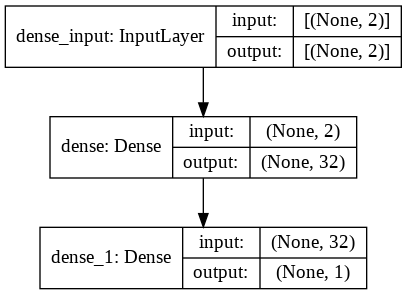

In [6]:
# 좀 더 명확하게 모델 확인하기
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)


모델 학습시키기

In [7]:
history = model.fit(data, label, epochs=200) # 학습 데이터주고, 정답주고, 공부 횟수 준 것 
# epochs= 는 몇 번 공부할 지를 정하는 것
# loss(손실값)이 떨어지는 것을 봐야함 - 정답과 가까워진다는 것
# loss가 떨어지지 않는다면 즉시 중단해야 한다.
# acc는 정답 값이라는 것인데 1.0은 다 맞춘다는 것이다.


Epoch 1/200
1/1 [==============================] - 0s 376ms/step - loss: 0.2646 - acc: 0.5000
Epoch 2/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2621 - acc: 0.2500
Epoch 3/200
1/1 [==============================] - 0s 7ms/step - loss: 0.2603 - acc: 0.2500
Epoch 4/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2589 - acc: 0.2500
Epoch 5/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2578 - acc: 0.2500
Epoch 6/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2568 - acc: 0.2500
Epoch 7/200
1/1 [==============================] - 0s 6ms/step - loss: 0.2558 - acc: 0.2500
Epoch 8/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2550 - acc: 0.2500
Epoch 9/200
1/1 [==============================] - 0s 4ms/step - loss: 0.2541 - acc: 0.2500
Epoch 10/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2533 - acc: 0.2500
Epoch 11/200
1/1 [==============================] - 0s 4ms/step - loss: 0.252

학습결과 무조건 그려보기

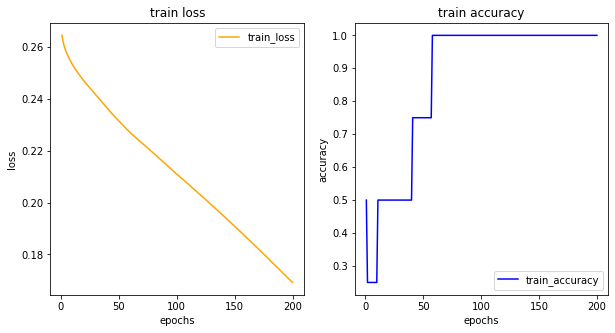

In [8]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'orange', label = 'train_loss')
ax1.set_title('train loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_accuracy')
ax2.set_title('train accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('accuracy')
ax2.legend()

plt.show()

###### 손실함수가 떨어지는지 // acc가 올라가는지 확인해야 한다.
# 손실이 줄어들어야 정확도가 올라간다.
# 약 400번 이상은 돌려야 한다. 
# 100번만 실행했을 때 손실값이 내려가는 양상이라면 학습을 더 시켜줘야 한다!

모델 가중치 확인하기

In [9]:
model.get_weights() 

# 어디에 가중치를 더 줘서 학습을 시켰는지 확인할 수 있다.

[array([[ 0.25162622, -0.3109216 ,  0.57184696,  0.10854518, -0.22401929,
          0.22133295,  0.38230857, -0.07066254, -0.13779789, -0.24241659,
          0.12471908, -0.05979349,  0.12588507,  0.15915841,  0.16144453,
          0.45627096, -0.03311983, -0.37055987, -0.3493019 ,  0.209023  ,
         -0.3055858 , -0.33232692, -0.12625915,  0.16120294, -0.32084438,
         -0.4093977 ,  0.43027043, -0.17278033, -0.22683546,  0.38228717,
         -0.33862218, -0.00082418],
        [-0.32846928,  0.309641  ,  0.21921603, -0.19489145,  0.22294445,
          0.18332313, -0.2337497 ,  0.28155303,  0.06527963,  0.24046376,
          0.12532483,  0.1300193 ,  0.10382512,  0.39729974,  0.37233323,
          0.2772466 , -0.01398495, -0.06497911,  0.04891233,  0.41530502,
          0.38950697,  0.33402607, -0.2543157 ,  0.33528423,  0.35920143,
         -0.17654489, -0.4310026 , -0.3430747 ,  0.22727506,  0.25065142,
          0.05100494, -0.4087645 ]], dtype=float32),
 array([ 1.87119306e-03

모델 예측해보기

In [10]:
result = model.predict(data)
print(result)

[[0.44719073]
 [0.6010475 ]
 [0.6022009 ]
 [0.39668152]]


In [11]:
result = model.predict_classes(data)
print(result)
# 0과 1로 알려준다.(0.5 이상은 1로 본다.)

[[0]
 [1]
 [1]
 [0]]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [12]:
# 기본적으로 100번 정도 실행해보고 양상을 먼저 파악한다.
# 틀리면 옵티마이즈 되어서 그제서야 정확도가 올라간다